# KNN Algorithm

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
import matplotlib.pyplot as plt

In [5]:
df0=df[df.Gender=='Male']
df1=df[df.Gender=='Female']

In [6]:
df0.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df1.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


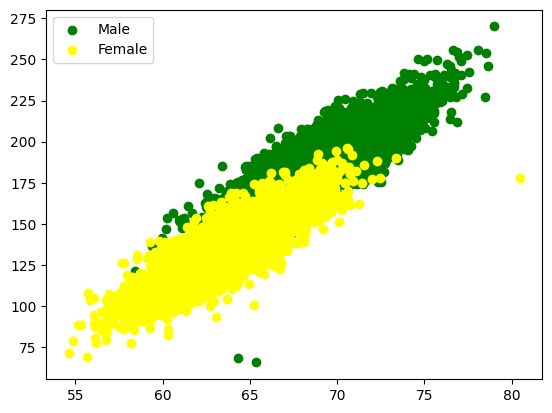

In [8]:
plt.scatter(df0['Height'],df0['Weight'],color='green',label='Male')
plt.scatter(df1['Height'],df1['Weight'],color='yellow',label='Female')
plt.legend()

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [12]:
df['Gender']=le.fit_transform(df.Gender)

In [13]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [15]:
x=df.drop('Gender',axis=1)
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [16]:
y=df.Gender
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
KNN=KNeighborsClassifier()

In [21]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [22]:
KNN.score(xtrain,ytrain)

0.9284600997506235

In [23]:
KNN.score(xtest,ytest)

0.9121084618980833

In [24]:
pr_KNN=KNN.predict(xtest)
pr_KNN

array([0, 1, 1, ..., 0, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(ytest,pr_KNN)

0.9121084618980833

#  Hyper parameter tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
import numpy as np

In [29]:
n_neighbors = [int(x) for x in np.linspace(start = 20, stop = 300, num = 20)]
weights = ['uniform', 'distance']

In [30]:
grids={'n_neighbors':n_neighbors,
   'weights':weights   
    
}


In [31]:
knn2=RandomizedSearchCV(KNN,grids,n_iter=100,cv=3)

In [32]:
knn2.fit(xtrain,ytrain)

/home/ashiq/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'n_neighbors': [20, 34, 49, 64, 78, 93,
                                                        108, 123, 137, 152, 167,
                                                        182, 196, 211, 226, 241,
                                                        255, 270, 285, 300],
                                        'weights': ['uniform', 'distance']})

In [33]:
knn2.best_params_

{'weights': 'uniform', 'n_neighbors': 34}

In [34]:
knn2.best_estimator_

KNeighborsClassifier(n_neighbors=34)

In [35]:
knn2.score(xtrain,ytrain)

0.9173940149625935

In [36]:
knn2.score(xtest,ytest)

0.9219261337073399

In [37]:
knn2.cv_results_

{'mean_fit_time': array([0.01026257, 0.00279069, 0.00278052, 0.00274626, 0.00271598,
        0.00279721, 0.00279872, 0.00273673, 0.00289631, 0.00282876,
        0.00276351, 0.00283535, 0.00290068, 0.00274038, 0.00274642,
        0.00281326, 0.00273824, 0.00272401, 0.00271893, 0.00270764,
        0.00276232, 0.00301218, 0.00268801, 0.00271146, 0.00272735,
        0.00289631, 0.00277448, 0.00277209, 0.00273323, 0.00280619,
        0.00278362, 0.00275795, 0.00278568, 0.00308728, 0.002702  ,
        0.00271781, 0.00269628, 0.00270335, 0.00286404, 0.00272767]),
 'std_fit_time': array([1.04546113e-02, 8.73994080e-05, 9.32287442e-05, 2.74214766e-05,
        1.28544740e-05, 5.36776662e-05, 6.98839882e-05, 2.09214473e-05,
        7.79518164e-05, 2.69390722e-05, 7.20279324e-05, 1.14889447e-04,
        1.42655532e-04, 1.14059475e-05, 2.41343779e-05, 8.67385738e-05,
        4.15478152e-05, 9.74377449e-06, 1.60657094e-05, 1.30896408e-05,
        8.98596641e-05, 5.55656822e-05, 7.18251771e-06, 4.525

In [38]:
results=pd.DataFrame(knn2.cv_results_)

In [39]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010263,0.010455,0.075209,0.032822,uniform,20,"{'weights': 'uniform', 'n_neighbors': 20}",0.910238,0.915381,0.918148,0.914589,0.003277,2
1,0.002791,0.000087,0.010487,0.000318,distance,20,"{'weights': 'distance', 'n_neighbors': 20}",0.904628,0.909771,0.914406,0.909602,0.003994,21
2,0.002781,0.000093,0.051322,0.000338,uniform,34,"{'weights': 'uniform', 'n_neighbors': 34}",0.909771,0.918186,0.920486,0.916148,0.004606,1
3,0.002746,0.000027,0.015592,0.000572,distance,34,"{'weights': 'distance', 'n_neighbors': 34}",0.907901,0.912108,0.917680,0.912563,0.004005,6
4,0.002716,0.000013,0.056997,0.000725,uniform,49,"{'weights': 'uniform', 'n_neighbors': 49}",0.907901,0.913043,0.921890,0.914278,0.005777,3
5,0.002797,0.000054,0.021681,0.000108,distance,49,"{'weights': 'distance', 'n_neighbors': 49}",0.906031,0.911173,0.920019,0.912408,0.005777,7
6,0.002799,0.000070,0.061084,0.000606,uniform,64,"{'weights': 'uniform', 'n_neighbors': 64}",0.907433,0.909771,0.921422,0.912875,0.006118,4
7,0.002737,0.000021,0.027244,0.000195,distance,64,"{'weights': 'distance', 'n_neighbors': 64}",0.906498,0.911641,0.920486,0.912875,0.005777,5
8,0.002896,0.000078,0.068172,0.000984,uniform,78,"{'weights': 'uniform', 'n_neighbors': 78}",0.906966,0.909771,0.919551,0.912096,0.005394,8
9,0.002829,0.000027,0.032450,0.000099,distance,78,"{'weights': 'distance', 'n_neighbors': 78}",0.906031,0.909771,0.919551,0.911784,0.005700,10


In [40]:
knn3=knn2.best_estimator_

In [41]:
knn3.score(xtest,ytest)

0.9219261337073399

Thank You